In [2]:
'''Keras Demo Notesbook. Also see: https://keras.io/examples/vision/mnist_convnet/'''

import numpy as np
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt
import seaborn
from matplotlib.pyplot import figure

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# give some shape infos
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


/home/codespace/.local/lib/python3.10/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


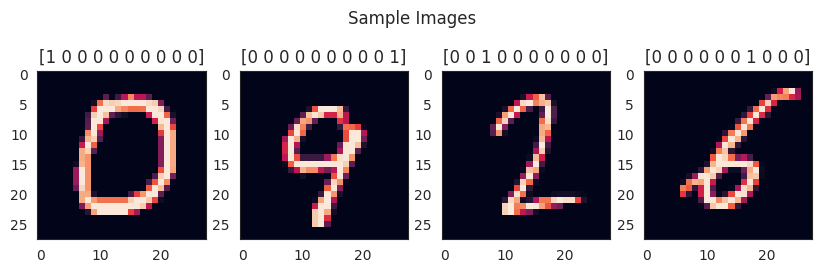

In [4]:
seaborn.set_style('white')
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,3))

# Empty list containers to collect image infos
images=[None]*4
y_images=[None]*4

# Grap some random images and y_test values
for idx,image_nr in enumerate([10,758,456,1209]):
    images[idx]=x_test[image_nr]
    y_images[idx]=y_test[image_nr]

# Print images and y_test values
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(images[i])
    plt.title(y_images[i].astype(int))

# Visualize images
plt.suptitle('Sample Images')
plt.show()

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
print ("Model build done.")

2023-02-02 15:14:21.520519: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-02 15:14:21.528372: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-02 15:14:21.528413: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-0284e1): /proc/driver/nvidia/version does not exist
2023-02-02 15:14:21.529301: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model build done.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

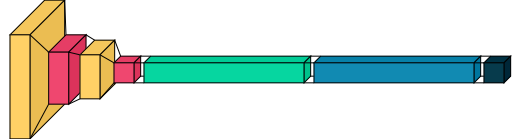

In [6]:
import visualkeras
model.summary()
# see: https://www.analyticsvidhya.com/blog/2022/03/visualize-deep-learning-models-using-visualkeras/
visualkeras.layered_view(model)


In [7]:
batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

2023-02-02 15:14:22.249201: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 169344000 exceeds 10% of free system memory.


Epoch 1/3
  4/422 [..............................] - ETA: 20s - loss: 2.2671 - accuracy: 0.1543 

2023-02-02 15:14:24.405779: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 17981568 exceeds 10% of free system memory.
2023-02-02 15:14:24.405845: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 17981568 exceeds 10% of free system memory.
2023-02-02 15:14:24.489453: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 17981568 exceeds 10% of free system memory.
2023-02-02 15:14:24.489567: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 17981568 exceeds 10% of free system memory.


422/422 [==============================] - 18s 39ms/step - loss: 0.3739 - accuracy: 0.8858 - val_loss: 0.0824 - val_accuracy: 0.9783
Epoch 2/3
422/422 [==============================] - 16s 38ms/step - loss: 0.1128 - accuracy: 0.9655 - val_loss: 0.0558 - val_accuracy: 0.9853
Epoch 3/3
422/422 [==============================] - 16s 38ms/step - loss: 0.0871 - accuracy: 0.9731 - val_loss: 0.0475 - val_accuracy: 0.9878


In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04900617152452469
Test accuracy: 0.9847000241279602


In [9]:
# Predict classes for Test-Images
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


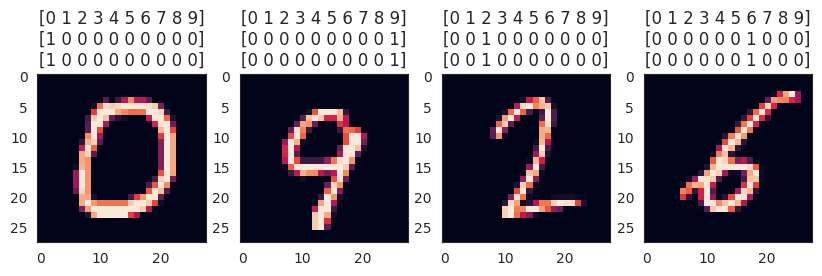

In [10]:
seaborn.set_style('white')
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10,3))

# Empty list containers to collect image infos
images=[None]*4
y_images=[None]*4
y_images_pred=[None]*4

# Grap some random images and y_test values
for idx,image_nr in enumerate([10,758,456,1209]):
    images[idx]=x_test[image_nr]
    y_images[idx]=y_test[image_nr]
    y_images_pred[idx]=y_pred[image_nr]

# Print images and y_test values
headline=np.arange(start=0, stop=10, step=1)

for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(images[i])
    plt.title("{}\n{}\n{}".format(headline, y_images[i].astype(int),y_images_pred[i].round().astype(int)))

# Visualize images
plt.show()